In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("GBvideos.csv",error_bad_lines= False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [4]:
dc= pd.read_csv("GBcomments.csv",error_bad_lines= False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
du= pd.read_csv("USvideos.csv",error_bad_lines= False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [6]:
df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [7]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
dc.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
dc.dropna(inplace= True)

In [11]:
dc.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [12]:
polarity= []
for i in dc["comment_text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
dc["polarity"]= polarity

In [14]:
dc.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [15]:
dc.shape

(718424, 5)

In [16]:
negative_comments= dc[dc["polarity"]<0]
negative_comments

,video_id,comment_text,likes,replies,polarity
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
61,jt2OHQh0HoQ,25 Hours WTF,1,0,-0.500000
74,jt2OHQh0HoQ,fuck you beech,0,1,-0.400000
75,jt2OHQh0HoQ,piece of shit,0,1,-0.200000
87,jt2OHQh0HoQ,Apple is terrible and they only care about the...,0,0,-0.500000
...,...,...,...,...,...
718417,lLN1FwiqGwc,"IT 2017 is better, IT 1990 was fucking trash",0,0,-0.050000
718419,lLN1FwiqGwc,Your imitation of Moss is horrible and you sho...,1,0,-0.566667
718424,lLN1FwiqGwc,Couldn't lure awkward fanart to Tumblr...........,0,0,-0.250000
718428,lLN1FwiqGwc,24:28 absolutely killed me,0,0,-0.200000


In [17]:
positive_comments= dc[dc["polarity"]>=0]
positive_comments

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00
...,...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0,0.00
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0,0.00
718449,lLN1FwiqGwc,That meme me dace 😂,0,0,0.00
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0,0.00


In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
stopwords=set(STOPWORDS)

In [21]:
allcomments= " ".join(positive_comments["comment_text"])

In [22]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(allcomments)

POSITIVE COMMENT WORD CLOUD

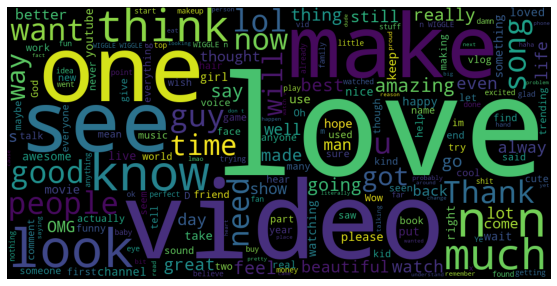

In [23]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
allcomments= " ".join(negative_comments["comment_text"])

In [25]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(allcomments)

POSITIVE COMMENT WORD CLOUD

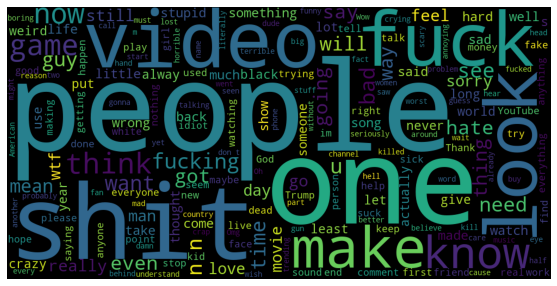

In [26]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
du.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


TRENDING TAGS


In [28]:
tags = " ".join(du["tags"])

In [29]:
import re

In [30]:
tags = re.sub("[^a-zA-Z]"," ",tags)

In [31]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

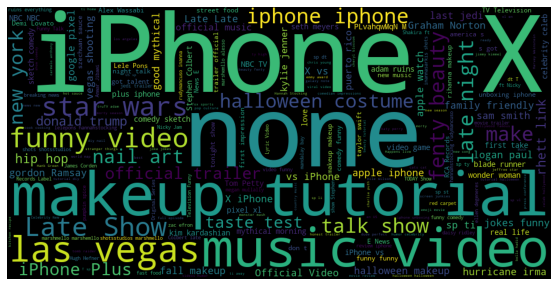

In [32]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

views and likes correlation

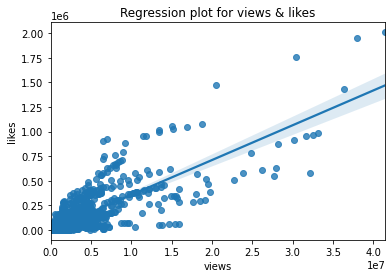

In [33]:
sns.regplot(data=du,x='views',y='likes')
plt.title('Regression plot for views & likes')
plt.show()

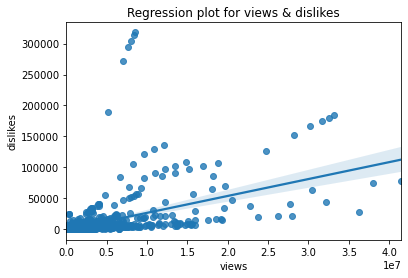

In [34]:
sns.regplot(data=du,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')
plt.show()

In [35]:
du_corr= du[["views","likes","dislikes"]]

<AxesSubplot:>

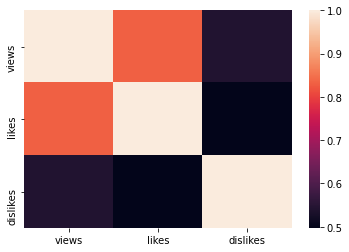

In [36]:
sns.heatmap(du_corr.corr())

EMOJI ANALYSIS

In [37]:
!pip install emoji

In [38]:
import emoji

In [43]:
import re

In [39]:
dc.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [40]:
comment=dc["comment_text"][8]



Extracting the emoji

In [48]:
l= []
for i in comment:
    if i in emoji.UNICODE_EMOJI["en"]:
        l.append(i)
l

['😭', '😭', '😭', '😢', '😢', '😢']

In [49]:
emojis= ""
for i in dc['comment_text']:
    new =[c for c in i if c in emoji.UNICODE_EMOJI["en"]]
    for j in new:
        emojis= emojis+ j

displaying all emojis

In [50]:
emojis

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [52]:
result = {}
for i in set(emojis):
    result[i]= emojis.count(i)

In [70]:
dr = pd.DataFrame.from_dict(result,orient='index').reset_index()

In [71]:
dr.head()

,index,0
0,🚂,11
1,🎌,2
2,🗝,9
3,🆚,16
4,🈲,5


In [73]:
dr.rename(columns = {'index':'emoji', 
                       0:'count'}, 
            inplace = True)

In [74]:
dr

,emoji,count
0,🚂,11
1,🎌,2
2,🗝,9
3,🆚,16
4,🈲,5
...,...,...
1118,➗,11
1119,🍕,111
1120,🕗,7
1121,🐔,43


MOST USED EMOJIS

In [79]:
dr.groupby("emoji")["count"].mean().sort_values(ascending = False).head(20)

emoji
😂    43947
❤    36780
😍    34856
🔥    10249
😭     9098
♥     7173
💕     6531
😘     6334
👍     5817
😬     5489
👏     5357
😊     4946
💖     4809
🏻     4412
💜     3616
👌     3534
💗     3071
💙     2968
🏼     2961
🙌     2734
Name: count, dtype: int64

C:\Users\mehul patole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehul patole\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mehul patole\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mehul patole\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mehul patole\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128556

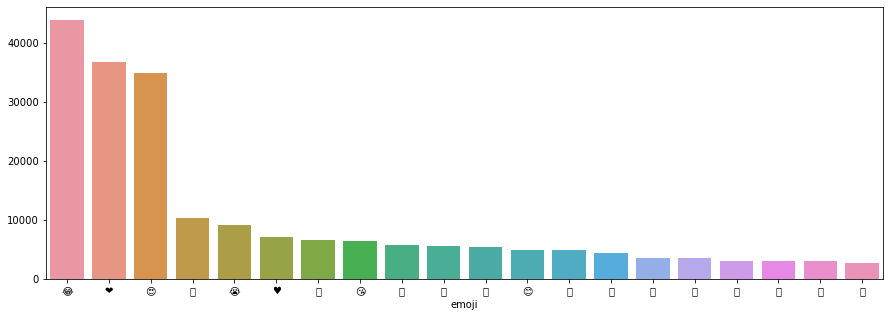

In [84]:
x= dr.groupby("emoji")["count"].mean().sort_values(ascending = False).head(20)
plt.figure(figsize=(15,5))
sns.barplot(x.index,x.values)
plt.show()

LEAST USED EMOJIS

In [81]:
dr.groupby("emoji")["count"].mean().sort_values(ascending = False).tail(20)

emoji
🧒    2
🧘    2
🧠    1
🧣    1
🤟    1
🦓    1
🦏    1
🥨    1
🥡    1
🥟    1
🥜    1
🥚    1
🥌    1
🤾    1
🤽    1
🤺    1
🤹    1
🛷    1
🛒    1
🧤    1
Name: count, dtype: int64